## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_dropped = application_df.drop(columns=["EIN", "NAME"])
df_dropped.head() 

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
df_dropped.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_count = df_dropped['APPLICATION_TYPE'].value_counts()
application_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
list(application_count.loc[application_count < 500].index)

['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_count.loc[application_count < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
classification_count = df_dropped['CLASSIFICATION'].value_counts()

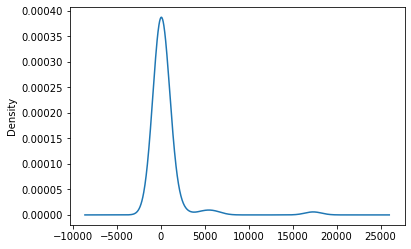

In [8]:
# Look at CLASSIFICATION value counts for binning
classification_count.plot.density()

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count.loc[classification_count < 500]

C1700    287
C4000    194
C5000    116
C1270    114
C2700    104
        ... 
C2570      1
C2561      1
C2500      1
C1732      1
C4500      1
Name: CLASSIFICATION, Length: 65, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_count.loc[classification_count < 500].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [11]:
df_dropped.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`

y = df_dropped["IS_SUCCESSFUL"]

X = pd.get_dummies(
    data = df_dropped.drop(["IS_SUCCESSFUL"], 1), 
    columns = ['APPLICATION_TYPE', 'CLASSIFICATION', 'SPECIAL_CONSIDERATIONS', 
               'ORGANIZATION', 'USE_CASE', 'AFFILIATION', 'INCOME_AMT']
    )
print(X.shape)
X.head()

(34299, 116)


,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,AFFILIATION_Regional,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,108590,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,142590,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
# Split our preprocessed data into our features and target arrays
y = y.values
X = X.values

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer 50/32
nn_model.add(tf.keras.layers.Dense(units= 43, activation= 'relu' , input_dim = 43 )) 

# Second hidden layer 50/none
nn_model.add(tf.keras.layers.Dense(units= 43, activation= 'relu' , input_dim = 43))

# Output layer
nn_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 43)                1892      
_________________________________________________________________
dense_1 (Dense)              (None, 43)                1892      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 44        
Total params: 3,828
Trainable params: 3,828
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn_model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [17]:
# Train the model
fit_model = nn_model.fit(X_train_scaled , y_train , epochs = 100)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\h-torihara\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-8d6eb1afc726>", line 2, in <module>
    fit_model = nn.fit(X_train_scaled , y_train , epochs = 100)
  File "C:\Users\h-torihara\Anaconda3\envs\PythonData\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 819, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\h-torihara\Anaconda3\envs\PythonData\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 235, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\h-torihara\Anaconda3\envs\PythonData\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 593, in _process_training_inputs
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\h-torihara\Anaconda3\envs\PythonData\lib\site-packages\tens

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
nn_model.save('Resources/AlphabetSoupCharity_Optimization.h5')